In [285]:
import numpy as np
import pandas as pd
import ast
from collections import defaultdict
from sklearn.model_selection import ParameterGrid,train_test_split
import matplotlib.pyplot as plt
import os

In [3]:
file_path = 'archive/LeagueofLegends.csv'
full_data = pd.read_csv(file_path)
head = full_data.head(2)
head

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...


In [4]:
head.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address'],
      dtype='object')

## Data Processing

In [6]:
data = full_data[['bResult', 'golddiff', 'bKills', 'bTowers', 'bDragons', 'rKills', 'rTowers', 'rDragons']]

In [220]:
data

,bResult,golddiff,bKills,bTowers,bDragons,rKills,rTowers,rDragons,kill_events,dragon_events,tower_events,combined_events,gold_events
0,1,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...","[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...","[[37.267, None]]","[[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete...","[[39.23, 'TOP_LANE', 'INNER_TURRET'], [20.681,...","[[17.14, None], [30.934, None], [24.641, None]]","[(10.82, (0, 1)), (16.286, (0, 2)), (16.529, (...","[(17.14, (1, 0)), (24.641, (2, 0)), (30.934, (...","[(15.014, (0, 1)), (15.217, (0, 2)), (15.288, ...","[(0, 0, g), (1, 0, g), (2, -1, g), (3, -1, g),...","[(0, 0), (1, 0), (2, -1), (3, -1), (4, -3), (5..."
1,0,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...","[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...","[[32.545, None], [26.177, None], [19.119, None]]","[[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship...","[[19.257, 'MID_LANE', 'OUTER_TURRET'], [15.206...","[[12.264, None]]","[(11.104, (0, 1)), (12.332, (0, 2)), (12.387, ...","[(12.264, (1, 0)), (19.119, (1, 1)), (26.177, ...","[(15.206, (1, 0)), (15.306, (1, 1)), (19.257, ...","[(0, 0, g), (1, 0, g), (2, -1, g), (3, -1, g),...","[(0, 0), (1, 0), (2, -1), (3, -1), (4, 1), (5,..."
2,1,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...","[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...","[[24.577, None], [37.867, None], [30.87, None]...","[[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu...","[[24.62, 'MID_LANE', 'OUTER_TURRET'], [30.493,...",[],"[(5.255, (0, 1)), (6.351, (0, 2)), (8.449, (1,...","[(18.255, (0, 1)), (24.577, (0, 2)), (30.87, (...","[(15.045, (0, 1)), (17.34, (0, 2)), (18.294, (...","[(0, 0, g), (1, 0, g), (2, 0, g), (3, -1, g), ...","[(0, 0), (1, 0), (2, 0), (3, -1), (4, 0), (5, ..."
3,0,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...","[[8.274, 'TL Quas', 'TIP Rhux', ['TIP Apollo']...","[[19.941, 'BOT_LANE', 'OUTER_TURRET'], [38.77,...",[],"[[7.768, 'TIP Rush', 'TL IWDominate', ['TL Fen...","[[36.384, 'MID_LANE', 'NEXUS_TURRET'], [31.665...","[[26.274, None], [10.153, None], [18.515, None...","[(7.768, (1, 0)), (8.274, (1, 1)), (9.681, (2,...","[(10.153, (1, 0)), (18.515, (2, 0)), (26.274, ...","[(18.541, (0, 1)), (19.122, (1, 1)), (19.941, ...","[(0, 0, g), (1, 0, g), (2, -1, g), (3, 0, g), ...","[(0, 0), (1, 0), (2, -1), (3, 0), (4, 2), (5, ..."
4,1,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...","[[11.438, 'T8 Dodo8', 'CLG Doublelift', ['CLG ...","[[22.594, 'MID_LANE', 'OUTER_TURRET'], [34.213...","[[14.589, None], [30.307, None]]","[[11.988, 'CLG Doublelift', 'T8 Porpoise8', ['...","[[11.644, 'MID_LANE', 'OUTER_TURRET'], [12.438...","[[21.901, None]]","[(11.438, (0, 1)), (11.988, (1, 1)), (21.451, ...","[(14.589, (0, 1)), (21.901, (1, 1)), (30.307, ...","[(11.644, (1, 0)), (12.438, (2, 0)), (14.976, ...","[(0, 0, g), (1, 0, g), (2, 0, g), (3, -1, g), ...","[(0, 0), (1, 0), (2, 0), (3, -1), (4, 1), (5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,0,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...","[[9.158, 'SUP SnowFlower', 'YC CoCo', ['YC Moj...","[[12.448, 'BOT_LANE', 'OUTER_TURRET'], [27.646...",[],"[[12.593, 'YC Mojito', 'SUP GBM', ['SUP Stomag...","[[25.005, 'TOP_LANE', 'OUTER_TURRET'], [18.149...","[[10.135, 'FIRE_DRAGON'], [26.468, 'AIR_DRAGON...","[(9.158, (0, 1)), (9.188, (0, 2)), (12.593, (1...","[(10.135, (1, 0)), (18.424, (2, 0)), (26.468, ...","[(12.448, (0, 1)), (18.149, (1, 1)), (21.099, ...","[(0, 0, g), (1, 0, g), (2, -1, g), (3, -1, g),...","[(0, 0), (1, 0), (2, -1), (3, -1), (4, 0), (5,..."
7616,0,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -...","[[17.174, 'DP Marshall', 'GAL Rare', ['GAL Vik...","[[23.085, 'BOT_LANE', 'INNER_TURRET'], [17.368...","[[18.322, 'WATER_DRAGON'], [25.473, 'AIR_DRAGO...","[[3.361, 'GAL Veux', 'DP KaKAO', ['DP Ruvelius...","[[38.311, 'MID_LANE', 'NEXUS_TURRET'],

In [141]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

### For rKills

In [7]:
def expand_rKills_with_details(row):
    expanded_rows = []
    current_head_diff = 0  # Initialize or calculate based on your logic

    for kill in row['rKills']:
        kill = ast.literal_eval(kill)
        new_row = row.to_dict()  # Copy the current row
        timestamp = kill[0]
        # Example head difference update logic (simplified)
        current_head_diff += 1  # Increment head difference for each red kill
        new_head_diff = current_head_diff + 1  # Assuming each kill increases the head diff
        
        new_row['single_rKill'] = f"{timestamp}, ({current_head_diff},{new_head_diff})"
        
        expanded_rows.append(new_row)
        
    return expanded_rows

In [8]:
ast.literal_eval(train_data.iloc[0]['rKills'])[0]

[16.529,
 'TSM Lustboy',
 'C9 Balls',
 ['C9 Meteos', 'C9 Hai', 'C9 Sneaky'],
 10782,
 5030]

In [9]:
timeval = 1

In [10]:
def process_kills(row):
    # Initialize counters
    rKill_count = 0
    bKill_count = 0
    kill_events = []
    
    # Combine and sort kills by timestamp
    all_kills = [{'time': kill[0], 'team': 'r', 'details': kill} for kill in ast.literal_eval(row['rKills'])]
    all_kills += [{'time': kill[0], 'team': 'b', 'details': kill} for kill in ast.literal_eval(row['bKills'])]
    all_kills = sorted(all_kills, key=lambda x: x['time'])
    
    # Iterate through combined kills
    for kill in all_kills:
        if kill['team'] == 'r':
            rKill_count += 1
        else:
            bKill_count += 1
        kill_events.append((kill['time'], (rKill_count, bKill_count)))
    
    return kill_events

In [142]:
data['kill_events'] = data.apply(process_kills, axis=1)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
def expand_rows_based_on_kills(original_df):
    # List to hold the expanded rows
    expanded_rows = []

    # Iterate through each row in the original DataFrame
    for _, row in original_df.iterrows():
        # Access the kill_events for the current row
        kill_events = row['kill_events']
        
        # Iterate through each kill event
        for event in kill_events:
            # Create a new row from the current row, but as a dict to modify it
            new_row = row.to_dict()
            
            # Add the single_kill_event details for this kill
            new_row['single_kill_event'] = event
            
            # Append the modified row to the list of expanded rows
            expanded_rows.append(new_row)
    
    # Create a new DataFrame from the expanded rows
    expanded_df = pd.DataFrame(expanded_rows)
    
    return expanded_df

In [144]:
data_expanded_kills = expand_rows_based_on_kills(train_data)

In [145]:
def time_stages(df, time_range=timeval):

    df['time_stage_kill_event_1'] = df['single_kill_event'].apply(lambda x: (x[0] // time_range, x[1]))
 
    return df

In [146]:
data_expanded_kills = time_stages(data_expanded_kills, timeval)

In [147]:
def time_stages_diff(df):

    df['time_stage_event_diff'] = df['time_stage_kill_event_1'].apply(lambda x: (x[0], x[1][0] - x[1][1]))
 
    return df

In [148]:
data_expanded_kills = time_stages_diff(data_expanded_kills)

In [149]:
def calculate_win_probability_kill(df, prev_state, curr_state, base_win_prob=0.5, kill_impact=0.5):
    # first, make sure we are comparing two consecutive stage
    r_prev = prev_state[1][0] # (time, (red kill, blue kill))
    b_prev = prev_state[1][1]
    r_curr = curr_state[1][0]
    b_curr = curr_state[1][1]
    
    kill = -1
    kill_time = curr_state[0]
    
    if r_prev + 1 == r_curr:
        kill = 0 # 0 for red kill
    elif b_prev + 1 == b_curr:
        kill = 1 # 1 for blue kill
    else:
        print("ERROR data row")
        return
    
    matching_prev_state = df[df['time_stage_kill_event_1'] == prev_state]
    matching_curr_state = df[df['time_stage_kill_event_1'] == curr_state]
    wins_after_prev = matching_prev_state['bResult'].sum()
    wins_after_curr = matching_curr_state['bResult'].sum()
    total_prev = len(matching_prev_state)
    total_curr = len(matching_curr_state)
    
    matching_indexes = matching_curr_state.index
    prev_indexes = matching_indexes - 1
    prev_rows = df.loc[prev_indexes]
    count_matching_transfer = prev_rows[prev_rows['time_stage_kill_event_1'] == prev_state]
    count_matching_transfer_wins = count_matching_transfer[prev_rows['bResult'] == 1]
    
    # print(count_matching_transfer.shape[0], count_matching_transfer_wins.shape[0])
    
    # print(total_prev,total_curr, wins_after_prev,wins_after_curr)
    
    if count_matching_transfer.shape[0] == 0 and total_curr != 0:
        P_C_given_B = wins_after_curr / total_curr
        prob_combined = P_C_given_B * kill_impact + base_win_prob * (1 - kill_impact)
        return prob_combined, P_C_given_B, P_C_given_B
    elif total_curr == 0 and count_matching_transfer.shape[0] != 0:
        final_prob = count_matching_transfer_wins.shape[0] / count_matching_transfer.shape[0]
        prob_combined = final_prob * kill_impact + base_win_prob * (1 - kill_impact)
        return prob_combined, final_prob, final_prob
    elif total_curr == 0 and count_matching_transfer.shape[0] == 0:
        return base_win_prob,base_win_prob,base_win_prob

    
    # P_A_to_B = count_matching_transfer.shape[0] / total_prev
    P_C_given_B = wins_after_curr / total_curr
    # p_A_to_B_given_C = count_matching_transfer_wins.shape[0] / total_prev
    
    
    # final_prob = p_A_to_B_given_C * P_C_given_B / P_A_to_B
    final_prob = count_matching_transfer_wins.shape[0] / count_matching_transfer.shape[0]
    
    
    # if in some data sparse case, b team kills AND b_kill > r_kill, but prob < base, we still increase prob
    if (kill == 1) and (b_curr > r_curr) and (final_prob < base_win_prob):
        final_prob = P_C_given_B
    if (kill == 0) and (b_curr < r_curr) and (final_prob > base_win_prob): # if red kill but blue win probability is > base
        final_prob = P_C_given_B
        
    # print(final_prob)
    
    prob_combined = final_prob * kill_impact + base_win_prob * (1 - kill_impact)
    prob_final_state = P_C_given_B
    prob_computed = final_prob
    
    return prob_combined, prob_final_state, prob_computed
    
    
    

In [226]:
def calculate_win_probability_stage_based(df, prev_state, curr_state, base_win_prob=0.5, kill_impact=0.5):
    # first, make sure we are comparing two consecutive stage
    r_prev = prev_state[1][0] # (time, (red kill, blue kill))
    b_prev = prev_state[1][1]
    r_curr = curr_state[1][0]
    b_curr = curr_state[1][1]
    
    kill = -1
    kill_time = curr_state[0]
    
    if r_prev + 1 == r_curr:
        kill = 0 # 0 for red kill
    elif b_prev + 1 == b_curr:
        kill = 1 # 1 for blue kill
    else:
        print("ERROR data row")
        return
    
    matching_prev_state = df[df['time_stage_event_diff'] == (prev_state[0], r_prev - b_prev)]
    matching_curr_state = df[df['time_stage_event_diff'] == (curr_state[0], r_curr - b_curr)]
    wins_after_prev = matching_prev_state['bResult'].sum()
    wins_after_curr = matching_curr_state['bResult'].sum()
    total_prev = len(matching_prev_state)
    total_curr = len(matching_curr_state)
    
    if df.iloc[0].name in matching_curr_state.index:
        # Exclude the first row from matching_prev_state
        matching_curr_state = matching_curr_state.iloc[1:]
    
    matching_indexes = matching_curr_state.index
    prev_indexes = matching_indexes - 1
    prev_rows = df.loc[prev_indexes]
    count_matching_transfer = prev_rows[prev_rows['time_stage_event_diff'] == (prev_state[0], r_prev - b_prev)]
    count_matching_transfer_wins = count_matching_transfer[prev_rows['bResult'] == 1]
    
    # print(count_matching_transfer.shape[0], count_matching_transfer_wins.shape[0])
    
    # print(total_prev,total_curr, wins_after_prev,wins_after_curr)

    
    P_A_to_B = count_matching_transfer.shape[0] / total_prev
    P_C_given_B = wins_after_curr / total_curr
    p_A_to_B_given_C = count_matching_transfer_wins.shape[0] / total_prev
    final_prob = p_A_to_B_given_C * P_C_given_B / P_A_to_B
    
    
    # if in some data sparse case, b team kills AND b_kill > r_kill, but prob < base, we still increase prob
    if (kill == 1) and (b_curr > r_curr) and (final_prob < base_win_prob):
        final_prob = P_C_given_B
    if (kill == 0) and (b_curr < r_curr) and (final_prob > base_win_prob): # if red kill but blue win probability is > base
        final_prob = P_C_given_B
        
    # print(final_prob)
    
    prob_combined = final_prob * kill_impact + base_win_prob * (1 - kill_impact)
    prob_final_state = P_C_given_B
    prob_computed = final_prob
    
    return prob_combined, prob_final_state, prob_computed, 
    
    
    

In [100]:
calculate_win_probability_kill(data_expanded_kills, (30, (8,10)), (31, (9,10)))

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(0.5, 0.6153846153846154, 0.5)

In [218]:
calculate_win_probability_stage_based(data_expanded_kills, (6, (8,10)), (7, (9,10)))

Int64Index([42, 305, 483, 734, 936], dtype='int64')


/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(0.3896742671009772, 0.5819761129207384, 0.27934853420195443)

In [81]:
data_expanded_kills['time_stage_event'][:10]

0    (2.0, (0, 1))
1    (3.0, (0, 2))
2    (3.0, (1, 2))
3    (3.0, (2, 2))
4    (3.0, (2, 3))
5    (3.0, (3, 3))
6    (3.0, (3, 4))
7    (5.0, (3, 5))
8    (5.0, (3, 6))
9    (5.0, (4, 6))
Name: time_stage_event, dtype: object

In [150]:
def win_probability_kill_based(test_row = 1, prob = 0.5, print_result = True, time = 1000):
    
    last_prob = -1

    prob_lst = []
    prob_final_lst = []
    prob_computed_lst = []
    for i in range( len(data['kill_events'][test_row]) - 1 ):
        kill_event = data['kill_events'][test_row][i]
        kill_time = kill_event[0] // timeval
        kill = kill_event[1]
        state = (kill_time, kill)
        
        if kill_time > time:
            break
        
        kill_event_curr = data['kill_events'][test_row][i+1]
        kill_time_curr = kill_event_curr[0] // timeval
        kill_curr = kill_event_curr[1]
        state_curr = (kill_time_curr, kill_curr)
        
        prob, prob_final_state, prob_computed = calculate_win_probability_kill(data_expanded_kills, state, state_curr, prob)
        prob_lst.append(prob)
        prob_final_lst.append(prob_final_state)
        prob_computed_lst.append(prob_computed)
        
        if print_result:
            print(kill_event, kill_event_curr, prob)

    final_result = data['bResult'][test_row]
    
    if print_result:
        print(final_result)
    
    return prob_lst, prob_final_lst, prob_computed_lst
    
    

In [151]:
win_probability_kill_based(print_result=False, time=15)[0], data['bResult'][1]

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


([0.6346153846153846,
  0.5804655870445343,
  0.6815371413483542,
  0.7713241262297327,
  0.7919120631148664,
  0.8334560315574332,
  0.7500613491120499,
  0.7916973412226916],
 0)

In [152]:
def compare_results(df=data, k=10, time=1000):
    combined_sum = 0
    final_sum = 0
    computed_sum = 0
    
    total_runs = 0

    for i in range(k):
        if df.iloc[i]['kill_events'][0][0] > time: # if no events happens before time_to_pred
                continue
        
        idx = df.index[i]
        prob_lst, prob_final_lst, prob_computed_lst = win_probability_kill_based(test_row=idx, print_result=False, time=time)
        # if len(prob_lst) <= time:
        #     continue
        if (prob_lst[-1] < 0.5 and df.iloc[i]['bResult'] == 0) or (prob_lst[-1] >= 0.5 and df.iloc[i]['bResult'] == 1):
            combined_sum += 1
        if (prob_final_lst[-1] < 0.5 and df.iloc[i]['bResult'] == 0) or (prob_final_lst[-1] >= 0.5 and df.iloc[i]['bResult'] == 1):
            final_sum += 1
        if (prob_computed_lst[-1] < 0.5 and df.iloc[i]['bResult'] == 0) or (prob_computed_lst[-1] >= 0.5 and df.iloc[i]['bResult'] == 1):
            computed_sum += 1
        
        # print(prob_lst)
        total_runs += 1
            
    return combined_sum, final_sum, computed_sum, total_runs
    
    

#### Compare Results

In [42]:
compare_results(k=100,time=15)


/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(72, 70, 73, 98)

In [234]:
# stage diff compare
diff5 = compare_results(time=5)
diff10 = compare_results(time=10)
diff15 = compare_results(time=15)
diff20 = compare_results(time=20)
diff25 = compare_results(time=25)
diff30 = compare_results(time=30)
diffl = compare_results(time=-1)
diff5,diff10,diff15,diff20,diff25,diff30, diffl
# (72, 79, 72, 100),
#  (78, 77, 83, 97),
#  (72, 72, 72, 87),
#  (55, 57, 56, 67),
#  (38, 39, 38, 44),
#  (22, 22, 21, 25),
# (94, 98, 97, 100)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((72, 79, 72, 100),
 (78, 77, 83, 97),
 (72, 72, 72, 87),
 (55, 57, 56, 67),
 (38, 39, 38, 44),
 (22, 22, 21, 25))

In [246]:
# prob compare, timeval 5
time5 = compare_results(time=5)
time10 = compare_results(time=10)
time15 = compare_results(time=15)
time20 = compare_results(time=20)
time25 = compare_results(time=25)
time30 = compare_results(time=30)
time_ = compare_results(time=-1)


# ((74, 78, 72, 100),
#  (79, 76, 82, 97),
#  (71, 73, 71, 87),
#  (56, 60, 56, 67),
#  (38, 38, 38, 44),
#  (22, 19, 20, 25),
#  (98, 99, 97, 100))

time5,time10,time15,time20,time25,time30,time_

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((74, 78, 72, 100),
 (79, 76, 82, 97),
 (71, 73, 71, 87),
 (56, 60, 56, 67),
 (38, 38, 38, 44),
 (22, 19, 20, 25),
 (98, 99, 97, 100))

In [266]:
# prob compare, timeval 100
time5 = compare_results(time=5)
time10 = compare_results(time=10)
time15 = compare_results(time=15)
time20 = compare_results(time=20)
time25 = compare_results(time=25)
time30 = compare_results(time=30)
time_ = compare_results(time=-1)

# ((71, 79, 71, 100),
#  (78, 76, 84, 97),
#  (72, 72, 71, 87),
#  (56, 58, 56, 67),
#  (38, 39, 38, 44),
#  (22, 22, 22, 25),
#  (96, 99, 95, 100))

time5,time10,time15,time20,time25,time30,time_

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((71, 79, 71, 100),
 (78, 76, 84, 97),
 (72, 72, 71, 87),
 (56, 58, 56, 67),
 (38, 39, 38, 44),
 (22, 22, 22, 25),
 (96, 99, 95, 100))

In [273]:
# prob compare, timeval 2
time5 = compare_results(time=5)
time10 = compare_results(time=10)
time15 = compare_results(time=15)
time20 = compare_results(time=20)
time25 = compare_results(time=25)
time30 = compare_results(time=30)
time_ = compare_results(time=-1)


# ((76, 78, 79, 100),
#  (82, 78, 83, 97),
#  (72, 72, 73, 87),
#  (61, 61, 59, 67),
#  (38, 36, 38, 44),
#  (23, 20, 22, 25),
#  (97, 97, 97, 100))

time5,time10,time15,time20,time25,time30,time_

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((76, 78, 79, 100),
 (82, 78, 83, 97),
 (72, 72, 73, 87),
 (61, 61, 59, 67),
 (38, 36, 38, 44),
 (23, 20, 22, 25),
 (97, 97, 97, 100))

In [82]:
# prob compare, timeval 1
time15 = compare_results(k=100,time=15)
time18 = compare_results(k=100,time=18)
time20 = compare_results(k=100,time=20)
time25 = compare_results(k=100,time=25)
time30 = compare_results(k=100,time=30)
time_ = compare_results(k=100,time=1000)

# ((72, 70, 73, 98),
#  (79, 72, 79, 98),
#  (83, 73, 82, 98),
#  (87, 83, 87, 100),
#  (92, 86, 90, 100),
#  (99, 98, 99, 100))

# ((79, 70, 78, 98),
#  (83, 72, 81, 98),
#  (84, 73, 82, 98),
#  (92, 83, 90, 100),
#  (91, 86, 89, 100),
#  (100, 98, 99, 100))

time15, time18, time20,time25,time30,time_

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((79, 70, 78, 98),
 (83, 72, 81, 98),
 (84, 73, 82, 98),
 (92, 83, 90, 100),
 (91, 86, 89, 100),
 (100, 98, 99, 100))

In [155]:
# prob compare, timeval 1
time15 = compare_results(df=test_data,k=100,time=15)
time18 = compare_results(df=test_data,k=100,time=18)
time20 = compare_results(df=test_data,k=100,time=20)
time25 = compare_results(df=test_data,k=100,time=25)
time30 = compare_results(df=test_data,k=100,time=30)
time_ = compare_results(df=test_data,k=100,time=1000)

# ((72, 70, 73, 98),
#  (79, 72, 79, 98),
#  (83, 73, 82, 98),
#  (87, 83, 87, 100),
#  (92, 86, 90, 100),
#  (99, 98, 99, 100))

time15, time18, time20,time25,time30,time_

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((65, 65, 63, 97),
 (66, 65, 67, 100),
 (70, 76, 72, 100),
 (81, 80, 80, 100),
 (82, 84, 82, 100),
 (88, 88, 90, 100))

In [154]:
65/97

0.6701030927835051

In [126]:
test_data['bResult'][1321]

1321    1
3520    1
3176    1
132     0
1430    0
       ..
7240    0
4254    0
1041    1
3871    1
1142    0
Name: bResult, Length: 77, dtype: int64

In [171]:
compare_results(time=15)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(71, 73, 71, 87)

In [172]:
compare_results(time=20)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(56, 60, 56, 67)

In [179]:
56/67, 71/87, 79/97, 22/25

(0.835820895522388, 0.8160919540229885, 0.8144329896907216, 0.88)

In [173]:
compare_results(time=25)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(38, 38, 38, 44)

In [174]:
compare_results(time=30)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(22, 19, 20, 25)

##### Observe that for row idx 1, the last kill is 
(32.367, (8, 10)) (36.418, (9, 10)) 0.33765935662002844
Even if the state is (9,10), the win result of blue is still 0.34 < 0.5, this is because we take into account of previous probability and previous state. 

The probability of blue win if we ONLY consider the final state (7, (9,10)) is 0.55, the probability of blue win if we only consider the transition between state (6, (8,10)) and (7, (9,10)) is 0.40.

### For Dragon Kills

In [180]:
data.columns

Index(['bResult', 'golddiff', 'bKills', 'bTowers', 'bDragons', 'rKills',
       'rTowers', 'rDragons', 'kill_events'],
      dtype='object')

In [45]:
def process_dragons(row):
    # Initialize counters
    rDragon_count = 0
    bDragon_count = 0
    dragon_events = []
    
    # Combine and sort dragons by timestamp
    all_dragons = [{'time': dragon[0], 'team': 'r', 'details': dragon} for dragon in ast.literal_eval(row['rDragons'])]
    all_dragons += [{'time': dragon[0], 'team': 'b', 'details': dragon} for dragon in ast.literal_eval(row['bDragons'])]
    all_dragons = sorted(all_dragons, key=lambda x: x['time'])
    
    # Iterate through combined kills
    for kill in all_dragons:
        if kill['team'] == 'r':
            rDragon_count += 1
        else:
            bDragon_count += 1
        dragon_events.append((kill['time'], (rDragon_count, bDragon_count)))
    
    return dragon_events

In [46]:
data['dragon_events'] = data.apply(process_dragons, axis=1)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
def expand_rows_based_on_dragons(original_df):
    # List to hold the expanded rows
    expanded_rows = []

    # Iterate through each row in the original DataFrame
    for _, row in original_df.iterrows():
        # Access the dragon_events for the current row
        dragon_events = row['dragon_events']
        
        # Iterate through each kill event
        for event in dragon_events:
            # Create a new row from the current row, but as a dict to modify it
            new_row = row.to_dict()
            
            # Add the single_kill_event details for this kill
            new_row['single_dragon_event'] = event
            
            # Append the modified row to the list of expanded rows
            expanded_rows.append(new_row)
    
    # Create a new DataFrame from the expanded rows
    expanded_df = pd.DataFrame(expanded_rows)
    
    return expanded_df

In [156]:
data_expanded_dragons = expand_rows_based_on_dragons(train_data)

In [157]:
def time_stages_dragon(df, time_range=timeval):

    df['time_stage_dragon_event'] = df['single_dragon_event'].apply(lambda x: (x[0] // time_range, x[1]))
 
    return df

In [158]:
data_expanded_dragons = time_stages_dragon(data_expanded_dragons)

In [159]:
def calculate_win_probability_dragon(df, prev_state, curr_state, base_win_prob=0.5, dragon_impact=0.5):
    # first, make sure we are comparing two consecutive stage
    r_prev = prev_state[1][0] # (time, (red dragon, blue dragon))
    b_prev = prev_state[1][1]
    r_curr = curr_state[1][0]
    b_curr = curr_state[1][1]
    
    dragon = -1
    
    if r_prev + 1 == r_curr:
        dragon = 0 # 0 for red kill
    elif b_prev + 1 == b_curr:
        dragon = 1 # 1 for blue kill
    else:
        print("ERROR data row")
        return
    
    matching_prev_state = df[df['time_stage_dragon_event'] == prev_state]
    matching_curr_state = df[df['time_stage_dragon_event'] == curr_state]
    wins_after_prev = matching_prev_state['bResult'].sum()
    wins_after_curr = matching_curr_state['bResult'].sum()
    total_prev = len(matching_prev_state)
    total_curr = len(matching_curr_state)
    
    matching_indexes = matching_curr_state.index
    prev_indexes = matching_indexes - 1
    prev_rows = df.loc[prev_indexes]
    count_matching_transfer = prev_rows[prev_rows['time_stage_dragon_event'] == prev_state]
    count_matching_transfer_wins = count_matching_transfer[prev_rows['bResult'] == 1]
    
    if count_matching_transfer.shape[0] == 0 and total_curr != 0:
        P_C_given_B = wins_after_curr / total_curr
        prob_combined = P_C_given_B * dragon_impact + base_win_prob * (1 - dragon_impact)
        return prob_combined, P_C_given_B, P_C_given_B
    elif total_curr == 0 and count_matching_transfer.shape[0] != 0:
        final_prob = count_matching_transfer_wins.shape[0] / count_matching_transfer.shape[0]
        prob_combined = final_prob * dragon_impact + base_win_prob * (1 - dragon_impact)
        return prob_combined, final_prob, final_prob
    elif total_curr == 0 and count_matching_transfer.shape[0] == 0:
        return base_win_prob,base_win_prob,base_win_prob
    
    P_C_given_B = wins_after_curr / total_curr
    final_prob = count_matching_transfer_wins.shape[0] / count_matching_transfer.shape[0]
    
    
    # if in some data sparse case, b team dragons AND b_dragon > r_dragon, but prob < base, we still increase prob
    if (dragon == 1) and (b_curr > r_curr) and (final_prob < base_win_prob):
        final_prob = P_C_given_B
    if (dragon == 0) and (b_curr < r_curr) and (final_prob > base_win_prob): # if red dragon but blue win probability is > base
        final_prob = P_C_given_B
        
    # print(final_prob)
    
    prob_combined = final_prob * dragon_impact + base_win_prob * (1 - dragon_impact)
    prob_final_state = P_C_given_B
    prob_computed = final_prob
    
    return prob_combined, prob_final_state, prob_computed
    
    
    

In [161]:
def win_probability_dragon_based(test_row = 1, prob = 0.5, print_result = True):
    
    last_prob = -1

    prob_lst = []
    prob_final_lst = []
    prob_computed_lst = []
    for i in range( len(data['dragon_events'][test_row]) - 1 ):
        dragon_event = data['dragon_events'][test_row][i]
        dragon_time = dragon_event[0] // timeval
        dragon = dragon_event[1]
        state = (dragon_time, dragon)
        
        dragon_event_curr = data['dragon_events'][test_row][i+1]
        dragon_time_curr = dragon_event_curr[0] // timeval
        dragon_curr = dragon_event_curr[1]
        state_curr = (dragon_time_curr, dragon_curr)
        
        prob, prob_final_state, prob_computed = calculate_win_probability_dragon(data_expanded_dragons, state, state_curr, prob)
        prob_lst.append(prob)
        prob_final_lst.append(prob_final_state)
        prob_computed_lst.append(prob_computed)
        
        if print_result:
            print(dragon_event, dragon_event_curr, prob)

    final_result = data['bResult'][test_row]
    
    if print_result:
        print(final_result)
    
    return prob_lst, prob_final_lst, prob_computed_lst
    
    

In [162]:
win_probability_dragon_based()

(12.264, (1, 0)) (19.119, (1, 1)) 0.5990566037735849
(19.119, (1, 1)) (26.177, (1, 2)) 0.7125717801476621
(26.177, (1, 2)) (32.545, (1, 3)) 0.8108313446192856
0


/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


([0.5990566037735849, 0.7125717801476621, 0.8108313446192856],
 [0.5860655737704918, 0.7619047619047619, 0.7252747252747253],
 [0.6981132075471698, 0.8260869565217391, 0.9090909090909091])

### For Tower Taken

In [54]:
def process_towers(row):
    # Initialize counters
    rTower_count = 0
    bTower_count = 0
    tower_events = []
    
    # Combine and sort towers by timestamp
    all_towers = [{'time': tower[0], 'team': 'r', 'details': tower} for tower in ast.literal_eval(row['rTowers'])]
    all_towers += [{'time': tower[0], 'team': 'b', 'details': tower} for tower in ast.literal_eval(row['bTowers'])]
    all_towers = sorted(all_towers, key=lambda x: x['time'])
    
    # Iterate through combined kills
    for kill in all_towers:
        if kill['team'] == 'r':
            rTower_count += 1
        else:
            bTower_count += 1
        tower_events.append((kill['time'], (rTower_count, bTower_count)))
    
    return tower_events

In [55]:
data['tower_events'] = data.apply(process_towers, axis=1)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
def expand_rows_based_on_towers(original_df):
    # List to hold the expanded rows
    expanded_rows = []

    # Iterate through each row in the original DataFrame
    for _, row in original_df.iterrows():
        # Access the tower_events for the current row
        tower_events = row['tower_events']
        
        # Iterate through each kill event
        for event in tower_events:
            # Create a new row from the current row, but as a dict to modify it
            new_row = row.to_dict()
            
            # Add the single_kill_event details for this kill
            new_row['single_tower_event'] = event
            
            # Append the modified row to the list of expanded rows
            expanded_rows.append(new_row)
    
    # Create a new DataFrame from the expanded rows
    expanded_df = pd.DataFrame(expanded_rows)
    
    return expanded_df

In [163]:
data_expanded_towers = expand_rows_based_on_towers(train_data)

In [164]:
def time_stages_tower(df, time_range=timeval):

    df['time_stage_tower_event'] = df['single_tower_event'].apply(lambda x: (x[0] // time_range, x[1]))
 
    return df

In [165]:
data_expanded_towers = time_stages_tower(data_expanded_towers)

In [167]:
def calculate_win_probability_tower(df, prev_state, curr_state, base_win_prob=0.5, tower_impact=0.5):
    # first, make sure we are comparing two consecutive stage
    r_prev = prev_state[1][0] # (time, (red tower, blue tower))
    b_prev = prev_state[1][1]
    r_curr = curr_state[1][0]
    b_curr = curr_state[1][1]
    
    tower = -1
    
    if r_prev + 1 == r_curr:
        tower = 0 # 0 for red kill
    elif b_prev + 1 == b_curr:
        tower = 1 # 1 for blue kill
    else:
        print("ERROR data row")
        return
    
    matching_prev_state = df[df['time_stage_tower_event'] == prev_state]
    matching_curr_state = df[df['time_stage_tower_event'] == curr_state]
    wins_after_prev = matching_prev_state['bResult'].sum()
    wins_after_curr = matching_curr_state['bResult'].sum()
    total_prev = len(matching_prev_state)
    total_curr = len(matching_curr_state)
    
    matching_indexes = matching_curr_state.index
    prev_indexes = matching_indexes - 1
    prev_rows = df.loc[prev_indexes]
    count_matching_transfer = prev_rows[prev_rows['time_stage_tower_event'] == prev_state]
    count_matching_transfer_wins = count_matching_transfer[prev_rows['bResult'] == 1]
    
    
    if count_matching_transfer.shape[0] == 0 and total_curr != 0:
        P_C_given_B = wins_after_curr / total_curr
        prob_combined = P_C_given_B * tower_impact + base_win_prob * (1 - tower_impact)
        return prob_combined, P_C_given_B, P_C_given_B
    elif total_curr == 0 and count_matching_transfer.shape[0] != 0:
        final_prob = count_matching_transfer_wins.shape[0] / count_matching_transfer.shape[0]
        prob_combined = final_prob * tower_impact + base_win_prob * (1 - tower_impact)
        return prob_combined, final_prob, final_prob
    elif total_curr == 0 and count_matching_transfer.shape[0] == 0:
        return base_win_prob,base_win_prob,base_win_prob
    
    P_C_given_B = wins_after_curr / total_curr

    final_prob = count_matching_transfer_wins.shape[0] / count_matching_transfer.shape[0]
    
    
    # if in some data sparse case, b team towers AND b_tower > r_tower, but prob < base, we still increase prob
    if (tower == 1) and (b_curr > r_curr) and (final_prob < base_win_prob):
        final_prob = P_C_given_B
    if (tower == 0) and (b_curr < r_curr) and (final_prob > base_win_prob): # if red tower but blue win probability is > base
        final_prob = P_C_given_B
        
    # print(final_prob)
    
    prob_combined = final_prob * tower_impact + base_win_prob * (1 - tower_impact)
    prob_final_state = P_C_given_B
    prob_computed = final_prob
    
    return prob_combined, prob_final_state, prob_computed
    
    

In [168]:
def win_probability_tower_based(test_row = 1, prob = 0.5, print_result = True):

    prob_lst = []
    prob_final_lst = []
    prob_computed_lst = []
    for i in range( len(data['tower_events'][test_row]) - 1 ):
        tower_event = data['tower_events'][test_row][i]
        tower_time = tower_event[0] // timeval
        tower = tower_event[1]
        state = (tower_time, tower)
        tower_event_curr = data['tower_events'][test_row][i+1]
        tower_time_curr = tower_event_curr[0] // timeval
        tower_curr = tower_event_curr[1]
        state_curr = (tower_time_curr, tower_curr)
        
        prob, prob_final_state, prob_computed = calculate_win_probability_tower(data_expanded_towers, state, state_curr, prob)
        prob_lst.append(prob)
        prob_final_lst.append(prob_final_state)
        prob_computed_lst.append(prob_computed)
        
        if print_result:
            print(tower_event, tower_event_curr, prob)

    final_result = data['bResult'][test_row]
    
    # if print_result:
    #     print(final_result)
    
    return prob_lst, prob_final_lst, prob_computed_lst
    
    

In [86]:
win_probability_tower_based(10, print_result=False)[0]

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[0.6805555555555556,
 0.7248931623931625,
 0.7910180097680097,
 0.6849826890945312,
 0.7111782132341342,
 0.7786660296939902,
 0.6893330148469952,
 0.8446665074234976,
 0.755666587045082,
 0.877833293522541,
 0.9389166467612705,
 0.9694583233806353,
 0.9847291616903177,
 0.9923645808451589,
 0.8038745981148872,
 0.9019372990574436,
 0.9509686495287217]

In [63]:
data['bResult'][10]

1

### For golddiff

In [199]:
def process_gold(row):
    gold_events = []
    golddiff = ast.literal_eval(row['golddiff'])
    for t in range(len(golddiff)):
        gold_events.append((t, golddiff[t] // 100))
    return gold_events

In [200]:
data['gold_events'] = data.apply(process_gold, axis=1)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
def expand_rows_based_on_gold(original_df):
    expanded_rows = []

    for _, row in original_df.iterrows():
        golddiff = ast.literal_eval(row['golddiff'])
        
        # Iterate through each kill event
        for t in range(len(golddiff)):
            new_row = row.to_dict()
            
            # Add the single_kill_event details for this kill
            new_row['single_golddiff'] = (t, golddiff[t] // 100)
            
            # Append the modified row to the list of expanded rows
            expanded_rows.append(new_row)
    
    # Create a new DataFrame from the expanded rows
    expanded_df = pd.DataFrame(expanded_rows)
    
    return expanded_df

In [186]:
data_expanded_golddiff = expand_rows_based_on_gold(train_data)

In [188]:
def calculate_win_probability_golddiff(df, prev_state, curr_state, base_win_prob=0.5, gold_impact=0.5):

    
    matching_prev_state = df[df['single_golddiff'] == prev_state]
    matching_curr_state = df[df['single_golddiff'] == curr_state]
    wins_after_prev = matching_prev_state['bResult'].sum()
    wins_after_curr = matching_curr_state['bResult'].sum()
    total_prev = len(matching_prev_state)
    total_curr = len(matching_curr_state)
    
    matching_indexes = matching_curr_state.index
    prev_indexes = matching_indexes - 1
    prev_rows = df.loc[prev_indexes]
    count_matching_transfer = prev_rows[prev_rows['single_golddiff'] == prev_state]
    count_matching_transfer_wins = count_matching_transfer[prev_rows['bResult'] == 1]
    
    
    if count_matching_transfer.shape[0] == 0 and total_curr != 0:
        P_C_given_B = wins_after_curr / total_curr
        prob_combined = P_C_given_B * gold_impact + base_win_prob * (1 - gold_impact)
        return prob_combined, P_C_given_B, P_C_given_B
    elif total_curr == 0 and count_matching_transfer.shape[0] != 0:
        final_prob = count_matching_transfer_wins.shape[0] / count_matching_transfer.shape[0]
        prob_combined = final_prob * gold_impact + base_win_prob * (1 - gold_impact)
        return prob_combined, final_prob, final_prob
    elif total_curr == 0 and count_matching_transfer.shape[0] == 0:
        return base_win_prob,base_win_prob,base_win_prob
    
    P_C_given_B = wins_after_curr / total_curr

    final_prob = count_matching_transfer_wins.shape[0] / count_matching_transfer.shape[0]
    
    
        
    # print(final_prob)
    
    prob_combined = final_prob * gold_impact + base_win_prob * (1 - gold_impact)
    prob_final_state = P_C_given_B
    prob_computed = final_prob
    
    return prob_combined, prob_final_state, prob_computed
    
    

### Combine

In [202]:
def combine_and_label_events(row):

    kill_events = [(timestamp, scores, 'k') for timestamp, scores in row['kill_events']]
    dragon_events = [(timestamp, scores, 'd') for timestamp, scores in row['dragon_events']]
    tower_events = [(timestamp, scores, 't') for timestamp, scores in row['tower_events']]
    gold_events = [(timestamp, scores, 'g') for timestamp, scores in row['gold_events']]
    all_events = kill_events + dragon_events + tower_events + gold_events

    # Sort combined events by timestamp
    all_events_sorted = sorted(all_events, key=lambda x: x[0])
    
    return all_events_sorted

In [203]:
data['combined_events'] = data.apply(combine_and_label_events, axis=1)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [213]:
data['combined_events'][0][:50]

[(0, 0, 'g'),
 (1, 0, 'g'),
 (2, -1, 'g'),
 (3, -1, 'g'),
 (4, -3, 'g'),
 (5, -5, 'g'),
 (6, -5, 'g'),
 (7, -8, 'g'),
 (8, -5, 'g'),
 (9, -7, 'g'),
 (10, -11, 'g'),
 (10.82, (0, 1), 'k'),
 (11, -4, 'g'),
 (12, -8, 'g'),
 (13, -7, 'g'),
 (14, -8, 'g'),
 (15, -7, 'g'),
 (15.014, (0, 1), 't'),
 (15.217, (0, 2), 't'),
 (15.288, (1, 2), 't'),
 (16, 2, 'g'),
 (16.286, (0, 2), 'k'),
 (16.529, (1, 2), 'k'),
 (16.556, (1, 3), 't'),
 (16.791, (2, 2), 'k'),
 (17, 8, 'g'),
 (17.14, (1, 0), 'd'),
 (17.237, (2, 3), 't'),
 (17.856, (2, 4), 't'),
 (18, 7, 'g'),
 (18.733, (2, 3), 'k'),
 (18.784, (3, 3), 'k'),
 (18.88, (3, 4), 'k'),
 (19, 14, 'g'),
 (20, 9, 'g'),
 (20.681, (3, 4), 't'),
 (21, 1, 'g'),
 (22, 4, 'g'),
 (23, 4, 'g'),
 (23.038, (3, 5), 't'),
 (24, 12, 'g'),
 (24.641, (2, 0), 'd'),
 (25, 15, 'g'),
 (26, 16, 'g'),
 (27, 18, 'g'),
 (27.005, (3, 5), 'k'),
 (27.029, (3, 6), 'k'),
 (27.073, (4, 6), 'k'),
 (27.109, (4, 7), 'k'),
 (27.542, (3, 6), 't')]

In [265]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [302]:
def win_probability_combined(test_row = 1, prob = 0.5, print_result = True, time = 1000,hyperparams=[0.5,0.5,0.5,0.5]):

    prob_lst = []
    prob_final_lst = []
    prob_computed_lst = []
    time_lst = []
    
    idx_k = 0
    idx_d = 0
    idx_t = 0
    idx_g = 0
    
    for i in range( len(data['combined_events'][test_row]) - 1 ):
        combine_event = data['combined_events'][test_row][i]
        event_type = combine_event[-1]
        combine_time = combine_event[0] // timeval
        combine = combine_event[1]
        state = (combine_time, combine)
        
        
        if combine_time > time:
            break
        
        if event_type == 'k':
            idx_k += 1
            if idx_k >= len(data['kill_events'][test_row]):
                continue
            combine_event_curr = data['kill_events'][test_row][idx_k]
            combine_time_curr = combine_event_curr[0] // timeval
            combine_curr = combine_event_curr[1]
            state_curr = (combine_time_curr, combine_curr)

        if event_type == 'd':
            idx_d += 1
            if idx_d >= len(data['dragon_events'][test_row]):
                continue
            combine_event_curr = data['dragon_events'][test_row][idx_d]
            combine_time_curr = combine_event_curr[0] // timeval
            combine_curr = combine_event_curr[1]
            state_curr = (combine_time_curr, combine_curr)
            
        if event_type == 't':
            idx_t += 1
            if idx_t >= len(data['tower_events'][test_row]):
                continue
            combine_event_curr = data['tower_events'][test_row][idx_t]
            combine_time_curr = combine_event_curr[0] // timeval
            combine_curr = combine_event_curr[1]
            state_curr = (combine_time_curr, combine_curr)
            
        
        if event_type == 'g':
            idx_g += 1
            if idx_g >= len(data['gold_events'][test_row]):
                continue
            combine_event_curr = data['gold_events'][test_row][idx_g]
            combine_time_curr = combine_event_curr[0] // timeval
            combine_curr = combine_event_curr[1]
            state_curr = (combine_time_curr, combine_curr)    
        
        
        if event_type == 'k':
            prob, prob_final_state, prob_computed = calculate_win_probability_kill(data_expanded_kills, state, state_curr, prob, hyperparams[0])
        if event_type == 'd':
            prob, prob_final_state, prob_computed = calculate_win_probability_dragon(data_expanded_dragons, state, state_curr, prob, hyperparams[1])
        if event_type == 't':
            prob, prob_final_state, prob_computed = calculate_win_probability_tower(data_expanded_towers, state, state_curr, prob, hyperparams[2])
        if event_type == 'g':
            prob, prob_final_state, prob_computed = calculate_win_probability_golddiff(data_expanded_golddiff, state, state_curr, prob, hyperparams[3])
            
        prob_lst.append(prob)
        prob_final_lst.append(prob_final_state)
        prob_computed_lst.append(prob_computed)
        time_lst.append(combine_event[0])
        
        if print_result:
            print(combine_event, combine_event_curr, prob)

    final_result = data['bResult'][test_row]
    
    # if print_result:
    #     print(final_result)
    
    return prob_lst, prob_final_lst, prob_computed_lst, time_lst
    
    

In [172]:
def compare_results_combined(df=data, k=100, time=30, hyperparams=[0.5,0.5,0.5]):
    combined_sum = 0
    final_sum = 0
    computed_sum = 0
    
    total_runs = 0

    for i in range(k):
        if df.iloc[i]['combined_events'][0][0] > time: # if no events happens before time_to_pred
                continue
        
        idx = df.index[i]

        prob_lst, prob_final_lst, prob_computed_lst = win_probability_combined(test_row=idx, print_result=False, time=time, hyperparams=hyperparams)
        
        if (prob_lst[-1] < 0.5 and df.iloc[i]['bResult'] == 0) or (prob_lst[-1] >= 0.5 and df.iloc[i]['bResult'] == 1):
            combined_sum += 1
        if (prob_final_lst[-1] < 0.5 and df.iloc[i]['bResult'] == 0) or (prob_final_lst[-1] >= 0.5 and df.iloc[i]['bResult'] == 1):
            final_sum += 1
        if (prob_computed_lst[-1] < 0.5 and df.iloc[i]['bResult'] == 0) or (prob_computed_lst[-1] >= 0.5 and df.iloc[i]['bResult'] == 1):
            computed_sum += 1
            
        total_runs += 1
            
    return combined_sum, final_sum, computed_sum, total_runs
    
    

In [218]:
test = compare_results_combined(df=test_data,k=10, time=20, hyperparams=[0.5,0.1,0.1,0.2])
train = compare_results_combined(df=data,k=10, time=20, hyperparams=[0.5,0.1,0.1,0.2])
test, train

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((8, 7, 7, 10), (9, 7, 8, 10))

In [232]:
r_lst = []
for t in range(15,50,5):
    r = compare_results_combined(df=test_data, k=50, time=t, hyperparams=[0.5,0.1,0.1,0.7])
    print(r)
    r_lst.append(r)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(39, 36, 37, 50)
(40, 40, 38, 50)
(42, 42, 42, 50)
(46, 43, 43, 50)
(43, 43, 43, 50)
(45, 45, 46, 50)
(45, 45, 46, 50)


In [225]:
r_lst

[(39, 36, 37, 50),
 (37, 39, 39, 50),
 (40, 43, 39, 50),
 (42, 42, 42, 50),
 (39, 40, 41, 50),
 (42, 42, 42, 50),
 (43, 42, 40, 50),
 (44, 45, 43, 50)]

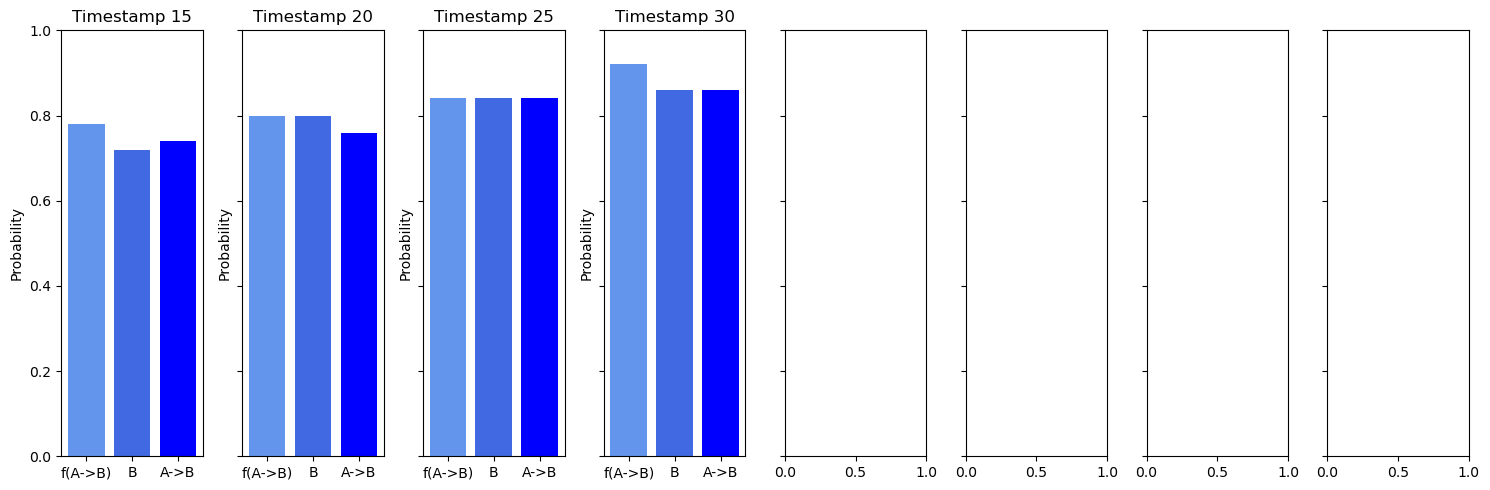

In [241]:


# Calculate probabilities
probabilities = [np.array(t[:3])/t[3] for t in r_lst[:4]]

# Plotting
fig, axs = plt.subplots(1, 8, figsize=(15, 5), sharey=True)

for i, prob in enumerate(probabilities):
    axs[i].bar(['f(A->B)','B','A->B'], prob, color=['cornflowerblue', 'royalblue', 'blue'])
    axs[i].set_title(f'Timestamp {i*5+15}')
    axs[i].set_ylim(0, 1)  # Ensure y-axis is the same for all to make comparison easier
    axs[i].set_ylabel('Probability')

plt.tight_layout()
plt.show()

In [177]:
test = compare_results_combined(df=test_data, k=100, time=30, hyperparams=[0.5,0.1,0.1,0.2])
train = compare_results_combined(k=100, time=30, hyperparams=[0.5,0.1,0.1,0.2])
test, train

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((86, 86, 83, 100), (91, 82, 88, 100))

In [221]:
cmp_1 = compare_results_combined(df=test_data, k=100, time=30, hyperparams=[0.5,0.1,0.1,0.8])
cmp_2 = compare_results_combined(df=test_data, k=100, time=30, hyperparams=[0.5,0.1,0.1,0.9])
cmp_7 = compare_results_combined(df=test_data, k=100, time=30, hyperparams=[0.5,0.1,0.1,0.7])
cmp_1,cmp_2,cmp_7

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((89, 89, 86, 100), (88, 89, 86, 100), (89, 89, 86, 100))

In [88]:
cmp_1 = compare_results_combined(k=200, time=20, hyperparams=[0.5,0.1,0.1])
cmp_2 = compare_results_combined(k=200, time=20, hyperparams=[0.5,0.1,0.2])
cmp_3 = compare_results_combined(k=200, time=20, hyperparams=[0.5,0.2,0.1])
cmp_4 = compare_results_combined(k=200, time=20, hyperparams=[0.6,0.1,0.1])
cmp_5 = compare_results_combined(k=200, time=20, hyperparams=[0.4,0.1,0.1])
cmp_6 = compare_results_combined(k=200, time=20, hyperparams=[0.3,0.1,0.1])
cmp_7 = compare_results_combined(k=200, time=20, hyperparams=[0.3,0.05,0.1])
cmp_8 = compare_results_combined(k=200, time=20, hyperparams=[0.3,0.05,0.1])

cmp_1,cmp_2,cmp_3,cmp_4,cmp_5,cmp_6,cmp_7,cmp_8

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


((177, 149, 165, 200),
 (177, 149, 165, 200),
 (177, 149, 165, 200),
 (174, 149, 165, 200),
 (177, 149, 166, 200),
 (178, 149, 166, 200),
 (178, 149, 166, 200),
 (178, 149, 166, 200))

In [89]:
177/200

0.885

In [135]:
# 0.5, 0.5, 0.5

cmp_20 = compare_results_combined(k=100, time=20) #(82, 74, 79, 100)
cmp_30 = compare_results_combined(k=100, time=30) #(88, 82, 83, 100)


/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(82, 74, 79, 100)

In [137]:
compare_results_combined(k=10, time=30)

/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(88, 82, 83, 100)

In [303]:
p_lst = win_probability_combined(test_row=1430, print_result=False, time=50, hyperparams=[0.2,0.05,0.05,0.2])


/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hezihang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [284]:
len(test_data['combined_events'][1430]), len(p_lst[0]), len(p_lst[-1])

(99, 95, 95)

In [307]:

# Directory to save frames, ensure it exists
frames_dir = './frames/'
os.makedirs(frames_dir, exist_ok=True)
reference_line_value = 0.5
for i in range(len(p_lst[0])):
    plt.figure(figsize=(10, 6))
    x_values = p_lst[-1][:i+1]
    y_values = p_lst[0][:i+1]

    # Plot the line
    plt.plot(x_values, y_values, color='white')  # Black line without markers for clarity

    # Fill below the line with transparent blue
    plt.fill_between(x_values, y_values, 0, color='blue', alpha=0.3)

    # Fill above the line with transparent red
    plt.fill_between(x_values, y_values, 1, color='red', alpha=0.3)
    
    # Ensure the x-axis represents the total count of time points
    plt.xlim(0, 50)
    plt.ylim(0, 1)  # Assuming probabilities are between 0 and 1
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.title('Blue Team Win Probability Change Over Time')
    plt.grid(True)  # Optional: Adds a grid for better visibility
    frame_path = f'{frames_dir}frame_{i:03d}.png'
    plt.savefig(frame_path)
    plt.close()

In [308]:
test_data['combined_events']

1321    [(0, 0, g), (1, 0, g), (2, 0, g), (3, 2, g), (...
3520    [(0, 0, g), (1, 0, g), (2, 0, g), (2.656, (0, ...
3176    [(0, 0, g), (1, 0, g), (2, 0, g), (3, 0, g), (...
132     [(0, 0, g), (1, 0, g), (2, 0, g), (3, 1, g), (...
1430    [(0, 0, g), (1, 0, g), (2, 1, g), (3, 2, g), (...
                              ...                        
3774    [(0, 0, g), (1, 0, g), (2, -1, g), (3, 0, g), ...
168     [(0, 0, g), (1, 0, g), (2, 0, g), (3, 0, g), (...
1215    [(0, 0, g), (1, 0, g), (2, -1, g), (3, -2, g),...
3973    [(0, 0, g), (1, 0, g), (2, -1, g), (3, -1, g),...
4269    [(0, 0, g), (1, 0, g), (2, 0, g), (3, -3, g), ...
Name: combined_events, Length: 762, dtype: object

In [309]:
test_data['combined_events'][1430][40:]

[(21, -3, 'g'),
 (21.837, (6, 3), 'k'),
 (22, -9, 'g'),
 (23, -11, 'g'),
 (24, -9, 'g'),
 (25, -8, 'g'),
 (26, -12, 'g'),
 (27, -11, 'g'),
 (27.359, (7, 3), 'k'),
 (27.673, (1, 2), 'd'),
 (28, -11, 'g'),
 (28.677, (8, 3), 'k'),
 (28.789, (9, 3), 'k'),
 (29, -21, 'g'),
 (30, -40, 'g'),
 (30.845, (5, 5), 't'),
 (31, -56, 'g'),
 (31.428, (9, 4), 'k'),
 (32, -49, 'g'),
 (32.114, (9, 5), 'k'),
 (33, -37, 'g'),
 (34, -34, 'g'),
 (34.024, (2, 2), 'd'),
 (34.836, (10, 5), 'k'),
 (34.909, (11, 5), 'k'),
 (35, -41, 'g'),
 (35.126, (6, 5), 't'),
 (36, -49, 'g'),
 (37, -48, 'g'),
 (37.639, (11, 6), 'k'),
 (37.674, (12, 6), 'k'),
 (37.834, (12, 7), 'k'),
 (38, -44, 'g'),
 (39, -37, 'g'),
 (39.277, (13, 7), 'k'),
 (39.396, (14, 7), 'k'),
 (40, -55, 'g'),
 (40.018, (7, 5), 't'),
 (40.593, (3, 2), 'd'),
 (41, -61, 'g'),
 (41.024, (15, 7), 'k'),
 (41.075, (16, 7), 'k'),
 (41.087, (16, 8), 'k'),
 (41.196, (17, 8), 'k'),
 (41.221, (17, 9), 'k'),
 (41.235, (17, 10), 'k'),
 (41.341, (17, 11), 'k'),
 (41.38

In [306]:
for i in range(50,len(p_lst[0])):
    print(p_lst[-1][i], p_lst[0][i])

28 0.27694720698471176
28.677 0.27610322013322397
28.789 0.25724621247021556
29 0.21829696997617248
30 0.174637575980938
30.845 0.16590569718189108
31 0.14872455774551285
31.428 0.17282580004256415
32 0.3382606400340513
32.114 0.27060851202724107
33 0.26866072266527113
34 0.2149285781322169
34.024 0.2125154825589394
34.836 0.17001238604715152
34.909 0.16934324217105454
35 0.33547459373684363
35.126 0.3276294354785729
36 0.46210354838285833
37 0.40968283870628674
37.639 0.3277462709650294
37.674 0.2621970167720235
37.834 0.2097576134176188
38 0.25669497962298393
39 0.23392741226981573
39.277 0.1871419298158526
39.396 0.14971354385268207
40 0.153104168415479
40.018 0.16066635129905285
41 0.19519974770590898
41.024 0.1561597981647272
41.075 0.12492783853178176
41.087 0.09994227082542541
41.196 0.07995381666034033
41.221 0.06396305332827228
41.235 0.051170442662617825
41.341 0.04093635413009426
41.389 0.13274908330407542
42 0.14619926664326036
42.004 0.145555969977764
42.79 0.1164447759822